In [218]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [219]:
data = pd.read_csv('./Walmart DataSet.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [221]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

**no null found**

In [222]:
data.duplicated().sum() 

0

**no duplicates found**

In [223]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


convert Data type from object to datetime

In [224]:
data['Date'] = pd.to_datetime(data['Date'], format='mixed')

let see for how many years we have the sales data

In [225]:
data['Date'].dt.year.value_counts().sort_index()

Date
2010    2160
2011    2340
2012    1935
Name: count, dtype: int64

***we have sales data for 3 years from 2010 to 2012

yearly sales

C:\Users\Giribabu Anisetti\AppData\Local\Temp\ipykernel_16420\836584345.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data['Date'].dt.year.value_counts().sort_index(), palette=palette)


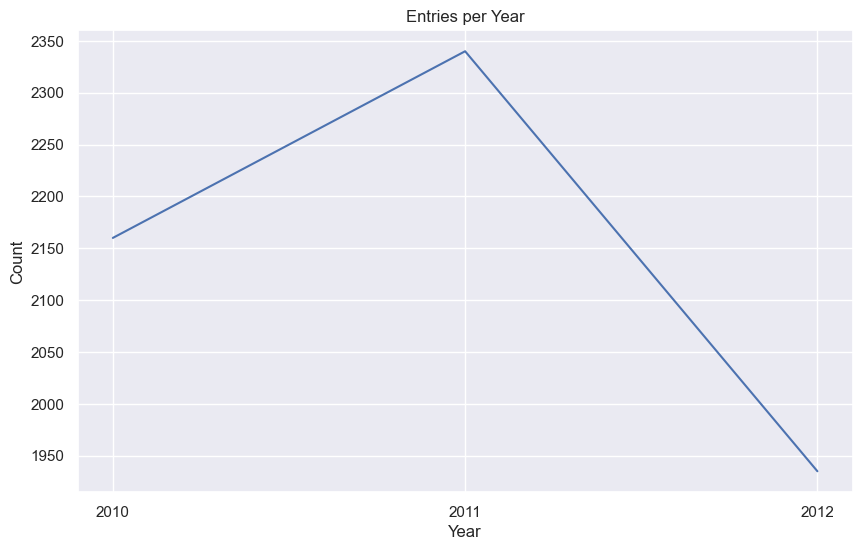

In [226]:
# Set the style and color palette
sns.set(style="darkgrid")
palette = sns.color_palette("viridis", as_cmap=True)

# Plot the line chart with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=data['Date'].dt.year.value_counts().sort_index(), palette=palette)
plt.title('Entries per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(ticks=data['Date'].dt.year.value_counts().index, labels=data['Date'].dt.year.value_counts().index)
plt.show()

- from 2010 sales were gradually increasing and the from 2011 it started decreasing
- 2011 has highest sales 
- 2012 has the lowest sales

In [227]:
print(f"count of stores: {data['Store'].nunique()}")


count of stores: 45


C:\Users\Giribabu Anisetti\AppData\Local\Temp\ipykernel_16420\2352097047.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data['Store'].value_counts().sort_index(), palette=palette)


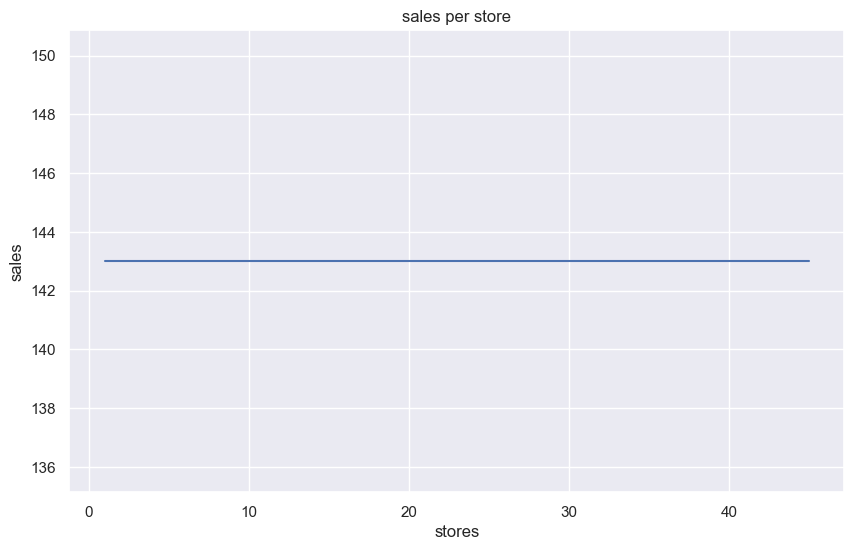

In [228]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data['Store'].value_counts().sort_index(), palette=palette)
plt.title('sales per store')
plt.xlabel('stores')
plt.ylabel('sales')
plt.show()

*** number of sales per store is constant over 3 years***

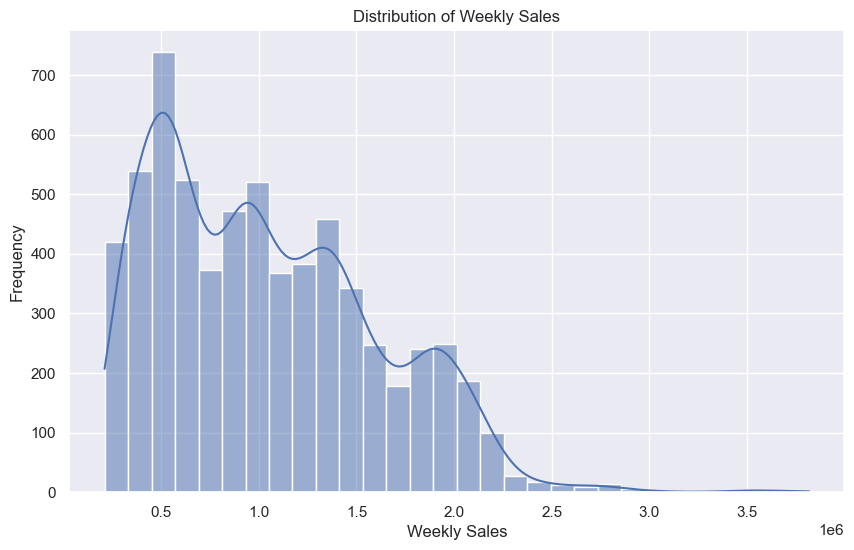

In [229]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Weekly_Sales'], bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

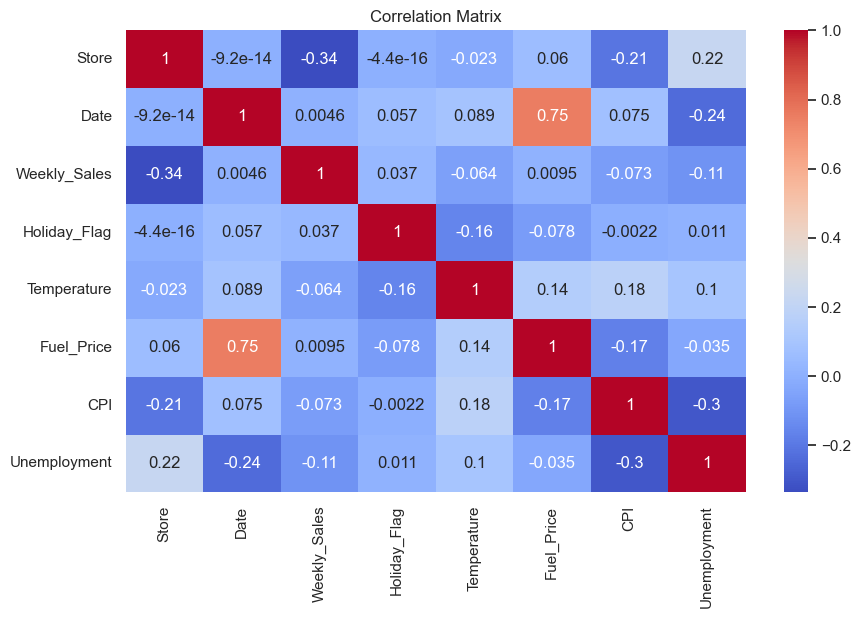

In [230]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [231]:
analysis_data = data.copy()

In [232]:
analysis_data['Year'] = analysis_data['Date'].dt.year

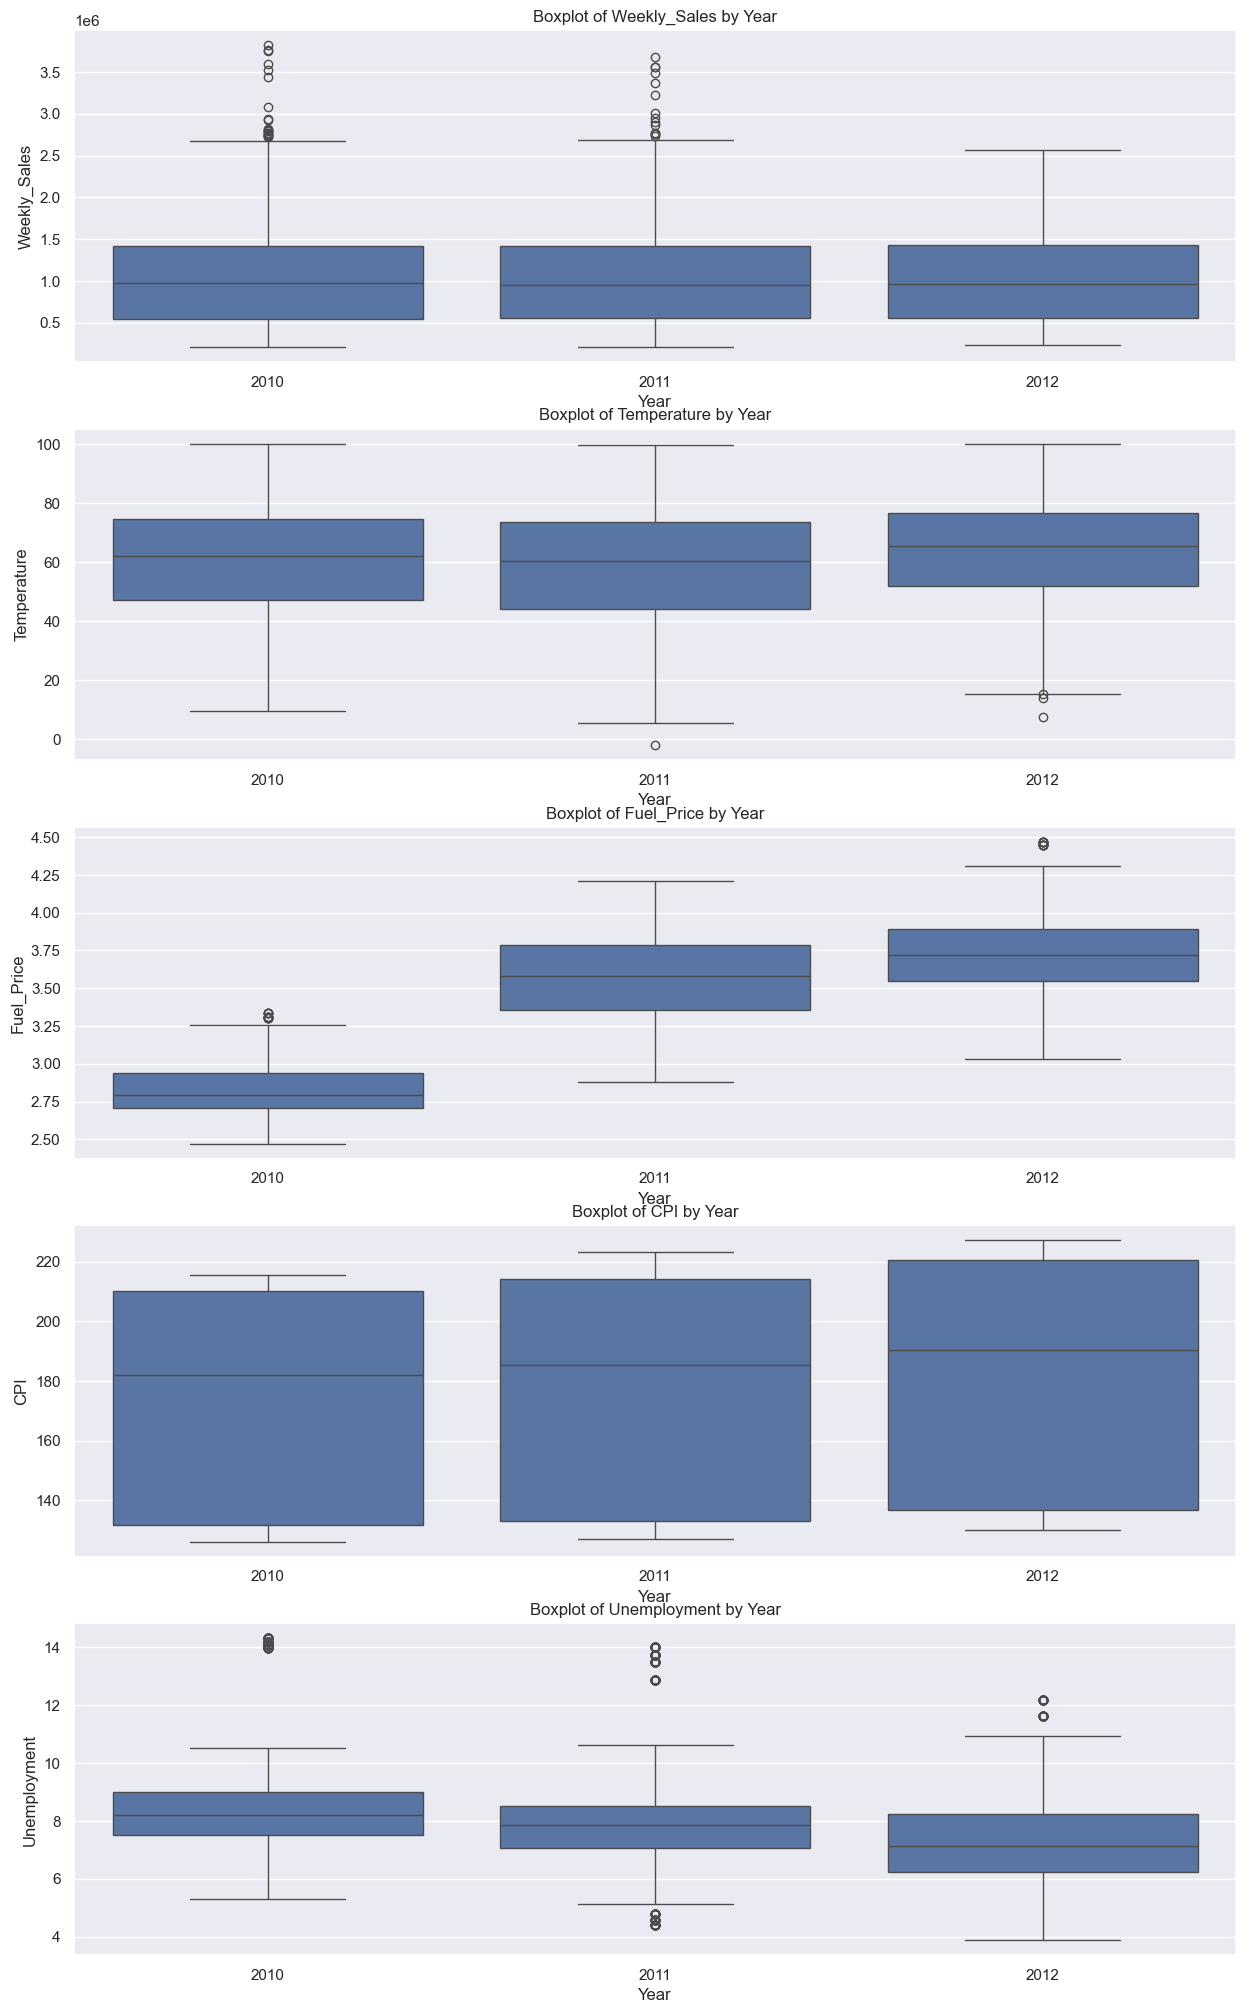

In [233]:
analysis_col = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
fig, axes = plt.subplots(5, 1, figsize=(15, 25))

for i, col in enumerate(analysis_col):
    sns.boxplot(x='Year', y=col, data=analysis_data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Year')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(col)


***as we can oultiers on yearly bases***

- 2010 : weekly sales, fuel price, unemployment has oultiers
- 2011 : weekly sales, temperature and unemployment has oultiers
- 2012 : temperature, fuel price and unemployment has oultiers

**CPI over the years has no outliers**

# Handle outliers using IQR

In [234]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


let check the shape of the data before removing outliers

In [235]:
analysis_data.shape

(6435, 9)

In [236]:
for col in ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment']:
        analysis_data = remove_outliers(analysis_data, col)

In [237]:
analysis_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012


after removing outliers

In [238]:
analysis_data.shape

(5917, 9)

Box plot after removing outliers

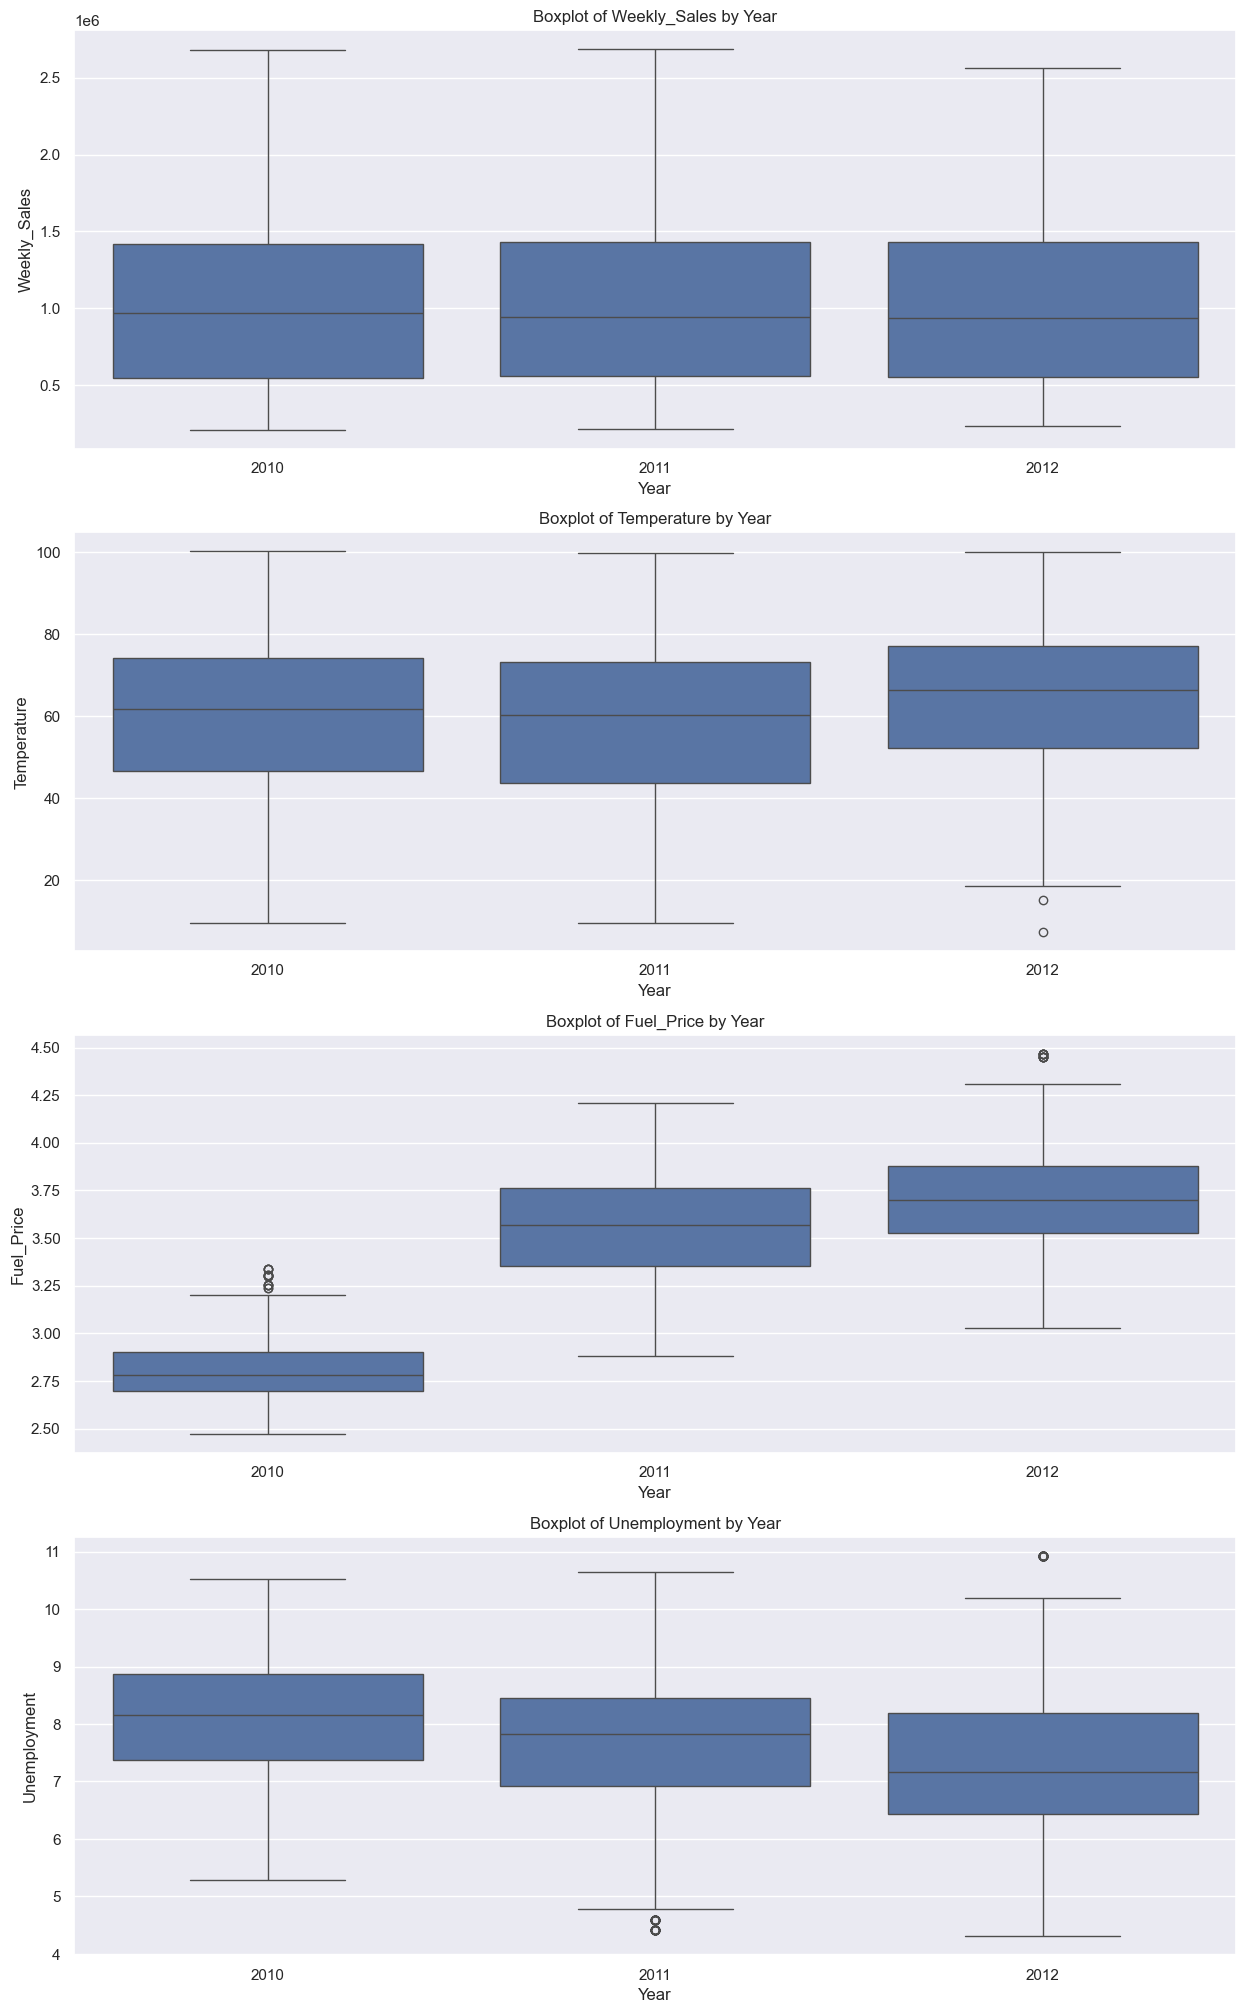

In [239]:
analysis_col = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment']
fig, axes = plt.subplots(4, 1, figsize=(15, 25))

for i, col in enumerate(analysis_col):
    sns.boxplot(x='Year', y=col, data=analysis_data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Year')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(col)

still we can see outlier over years in fuel_price and unemployment

In [240]:
analysis_data_2010 = analysis_data[analysis_data['Year'] == 2010]
analysis_data_2011 = analysis_data[analysis_data['Year'] == 2011]
analysis_data_2012 = analysis_data[analysis_data['Year'] == 2012]

analysis_data_2010 = remove_outliers(analysis_data_2010, 'Fuel_Price')
analysis_data_2011 = remove_outliers(analysis_data_2011, 'Fuel_Price')    
analysis_data_2012 = remove_outliers(analysis_data_2012, 'Fuel_Price')

analysis_data = pd.concat([analysis_data_2010, analysis_data_2011, analysis_data_2012])

analysis_data_2010 = analysis_data[analysis_data['Year'] == 2010]
analysis_data_2011 = analysis_data[analysis_data['Year'] == 2011]
analysis_data_2012 = analysis_data[analysis_data['Year'] == 2012]

analysis_data_2010 = remove_outliers(analysis_data_2010, 'Unemployment')
analysis_data_2011 = remove_outliers(analysis_data_2011, 'Unemployment')    
analysis_data_2012 = remove_outliers(analysis_data_2012, 'Unemployment')

analysis_data = pd.concat([analysis_data_2010, analysis_data_2011, analysis_data_2012])

In [241]:
analysis_data.shape

(5795, 9)

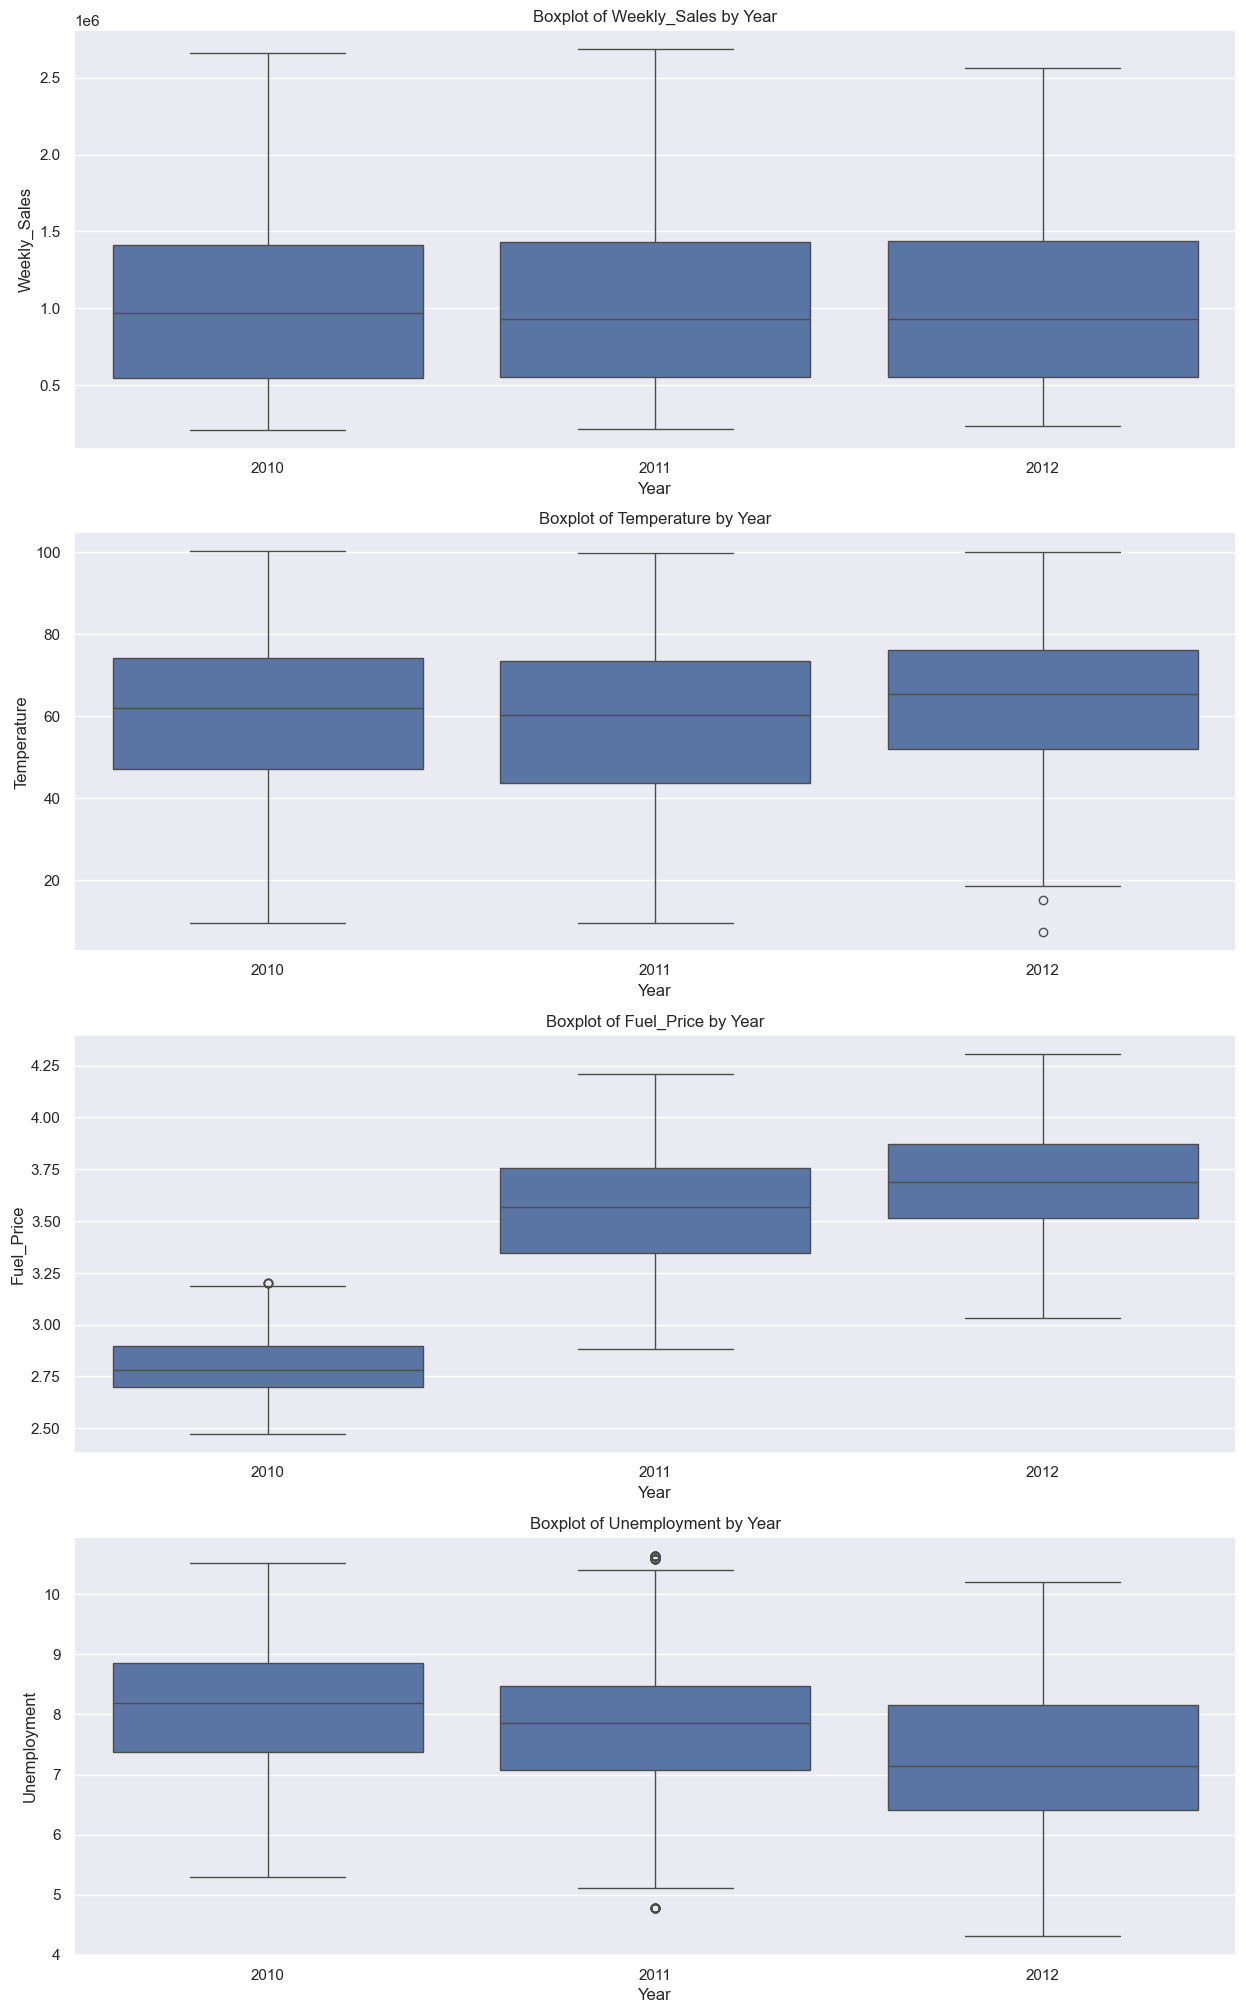

In [242]:
analysis_col = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment']
fig, axes = plt.subplots(4, 1, figsize=(15, 25))

for i, col in enumerate(analysis_col):
    sns.boxplot(x='Year', y=col, data=analysis_data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Year')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(col)

**we have remove most of the outliers**

In [243]:
missing_values = analysis_data.isnull().sum()
print(missing_values)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
dtype: int64


# Insight 1: Average Weekly Sales per Store

       Weekly_Sales
Store              
1        1555264.40
2        1905830.24
3         402704.44
4        2038739.25
5         318011.81
6        1556539.12
7         570705.97
8         908749.52
9         543980.55
10       1854633.48
11       1356383.12
12        977261.76
13       1957682.27
14       1986529.39
15        614320.09
16        519247.73
17        892246.96
18       1084718.42
19       1431442.23
20       2058998.05
21        756069.08
22       1028501.04
23       1340745.34
24       1346509.83
25        706721.53
26       1004217.67
27       1754405.36
28       1338400.82
29        539451.43
30        438579.62
31       1395901.44
32       1166568.15
33        259748.44
34        966781.56
35        919724.98
36        373511.99
37        518900.28
38        437884.70
39       1450668.13
40        946365.21
41       1268125.42
42        556120.64
43        633324.72
44        302748.87
45        785981.41


<Axes: xlabel='Store', ylabel='Weekly_Sales'>

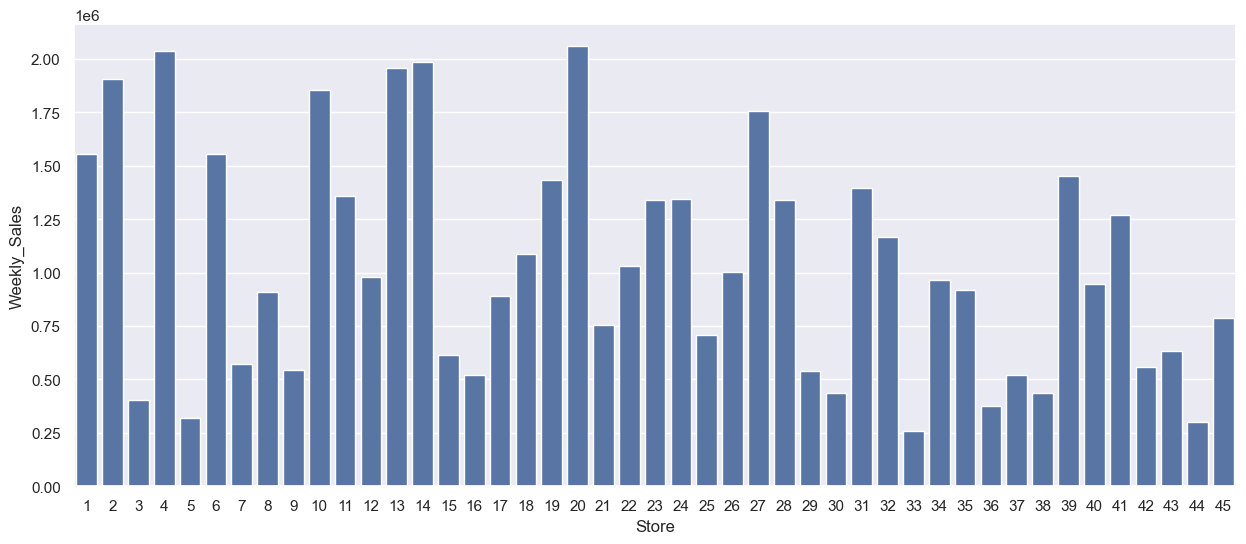

In [244]:
avg_sales_per_store = analysis_data.groupby('Store')['Weekly_Sales'].mean().round(2)
# convert to dataframe
avg_sales_per_store = pd.DataFrame(avg_sales_per_store)
print(avg_sales_per_store)
plt.figure(figsize=(15, 6))
sns.barplot(x=avg_sales_per_store.index, y='Weekly_Sales', data=avg_sales_per_store)

# Insight 2: Total Sales per Year

Year
2010    2,072,835,565.07
2011    2,192,105,878.88
2012    1,746,869,522.00
Name: Weekly_Sales, dtype: object


<Axes: xlabel='Year', ylabel='Weekly_Sales'>

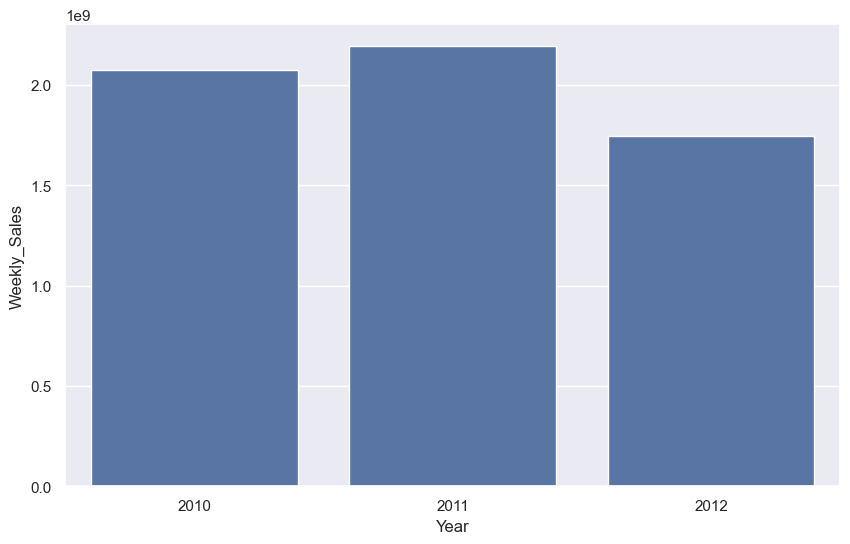

In [245]:
total_sales_per_year = analysis_data.groupby('Year')['Weekly_Sales'].sum() ##.apply(lambda x: f"{x:,.2f}")

print(total_sales_per_year.apply(lambda x: f"{x:,.2f}"))
total_sales_per_year = pd.DataFrame(total_sales_per_year)
plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales_per_year.index, y='Weekly_Sales', data=total_sales_per_year)

# Insight 3: Impact of Holidays on Sales

              Weekly_Sales
Holiday_Flag              
0               1033851.85
1               1085971.81


<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

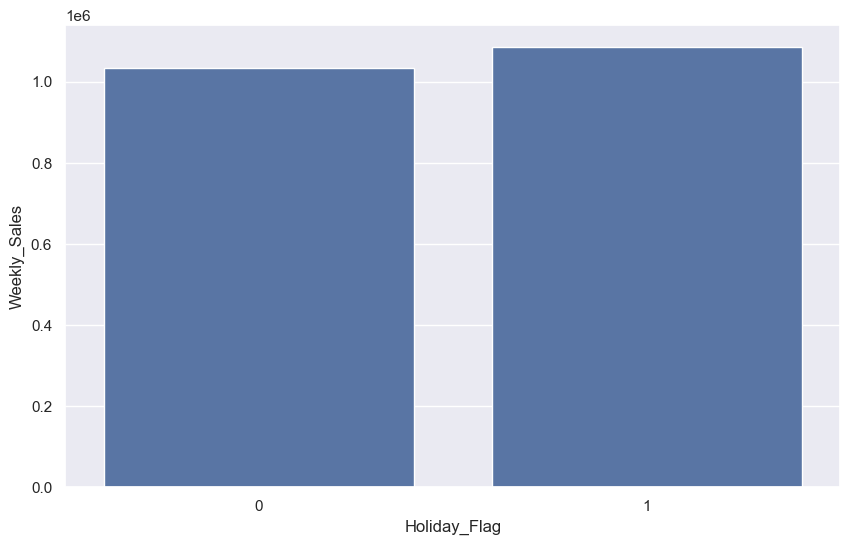

In [246]:
holiday_sales = analysis_data.groupby('Holiday_Flag')['Weekly_Sales'].mean().round(2)

holiday_sales = pd.DataFrame(holiday_sales)
print(holiday_sales)
plt.figure(figsize=(10, 6))
sns.barplot(x=holiday_sales.index, y='Weekly_Sales', data=holiday_sales)

# a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

***correlation between Weekly_Sales and Unemployment for each store***

In [247]:
store_correlations = analysis_data.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Unemployment']))
store_correlations

C:\Users\Giribabu Anisetti\AppData\Roaming\Python\Python312\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Giribabu Anisetti\AppData\Roaming\Python\Python312\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Giribabu Anisetti\AppData\Local\Temp\ipykernel_16420\2053936593.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  store_correlations = analysis_data.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Unemployment']))


Store
1    -0.097955
2     0.054288
3    -0.230413
4    -0.633422
5    -0.207043
6     0.016833
7    -0.165131
8    -0.052580
9    -0.191534
10    0.172113
11   -0.020339
12         NaN
13   -0.400254
14    0.269510
15    0.064749
16   -0.070864
17   -0.279019
18    0.139179
19    0.095112
20   -0.109391
21    0.218367
22    0.039043
23    0.063922
24    0.029528
25   -0.004958
26   -0.066556
27   -0.005561
28         NaN
29    0.084682
30    0.201862
31   -0.064738
32   -0.099455
33    0.120317
34    0.017010
35    0.483865
36    0.833734
37   -0.221287
38         NaN
39   -0.384681
40    0.024659
41   -0.350630
42   -0.356061
43   -0.201954
44   -0.780076
45   -0.004041
dtype: float64

Identify stores with the highest negative correlation

In [248]:
most_affected_stores = store_correlations.nsmallest(5)
print("Stores most affected by unemployment rate:")
most_affected_stores.sort_values()

Stores most affected by unemployment rate:


Store
44   -0.780076
4    -0.633422
13   -0.400254
39   -0.384681
42   -0.356061
dtype: float64

# b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [249]:
analysis_data['Month'] = analysis_data['Date'].dt.month

In [250]:
monthly_sales_over_years = analysis_data.groupby(['Year', 'Month'])['Weekly_Sales'].mean()
monthly_sales_over_years = pd.DataFrame(monthly_sales_over_years)
monthly_sales_over_years

Weekly_Sales
Year Month              
2010 1      9.482286e+05
     2      1.072693e+06
     3      1.043053e+06
     4      1.031109e+06
     5      1.047927e+06
     6      1.067430e+06
     7      1.035594e+06
     8      1.038411e+06
     9      1.009928e+06
     10     1.021246e+06
     11     1.119855e+06
     12     1.079136e+06
2011 1      9.486290e+05
     2      1.043087e+06
     3      1.020615e+06
     4      1.039544e+06
     5      1.023202e+06
     6      1.048114e+06
     7      9.998350e+05
     8      1.048787e+06
     9      1.030903e+06
     10     1.026964e+06
     11     1.093463e+06
     12     1.154692e+06
2012 1      9.637000e+05
     2      1.058110e+06
     3      1.022098e+06
     4      1.017468e+06
     5      1.045529e+06
     6      1.080697e+06
     7      1.001066e+06
     8      1.043621e+06
     9      9.812864e+05
     10     1.027325e+06
     11     1.047494e+06
     12     1.011228e+06

<Axes: xlabel='Month', ylabel='Weekly_Sales'>

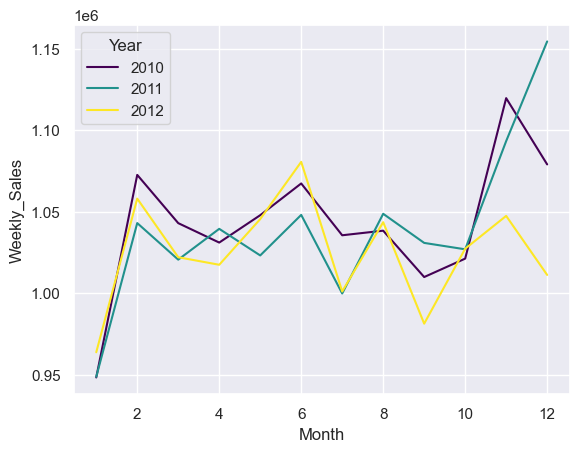

In [251]:
plt.Figure(figsize=(15, 6))
sns.lineplot(data=monthly_sales_over_years, x='Month', y='Weekly_Sales', hue='Year', palette=palette)

***Possible Reasons for Seasonal Trends:***
- Holiday Seasons: Sales typically increase during holiday seasons such as new year, mansoon sale, and christmas due to increased consumer spending.
- Weather Changes: Seasonal weather changes can affect sales, for example, increased sales of winter clothing and heating equipment during colder months.
- Promotional Events: Sales promotions and discounts during specific times of the year can also lead to seasonal trends.

# c. Does temperature affect the weekly sales in any manner?

Calculate the correlation between Temperature and Weekly_Sales

In [252]:
correlation = analysis_data['Temperature'].corr(analysis_data['Weekly_Sales'])
print(f"Correlation between Temperature and Weekly_Sales: {correlation}")


Correlation between Temperature and Weekly_Sales: -0.03165970692398368


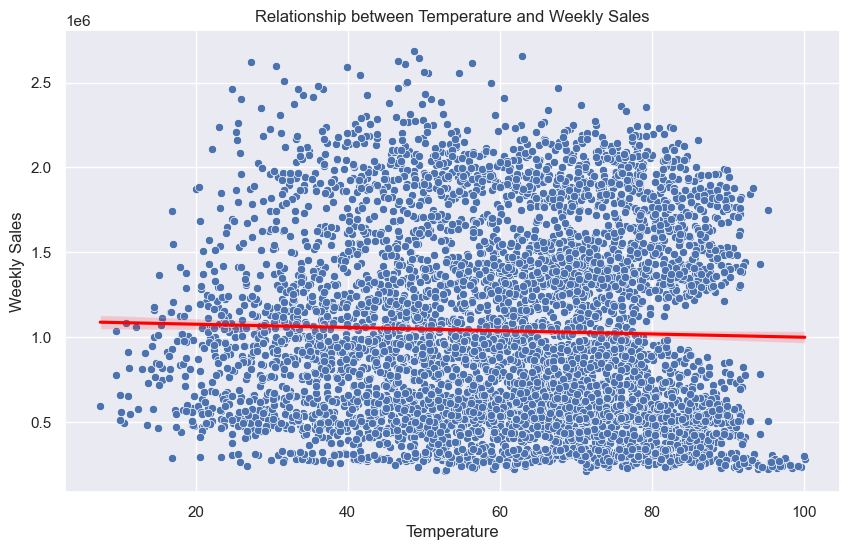

In [253]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=analysis_data)
sns.regplot(x='Temperature', y='Weekly_Sales', data=analysis_data, scatter=False, color='red')
plt.title('Relationship between Temperature and Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

the slope is negative, it suggests that as temperature increases, weekly sales tend to decrease.

# d. How is the Consumer Price index affecting the weekly sales of various stores?

In [254]:
correlation =analysis_data.groupby('Store').apply(lambda x : x['Weekly_Sales'].corr(x['CPI']))
most_affected_stores_by_cpi = correlation.nlargest(5)
print("Stores most affected by CPI:")
print(most_affected_stores_by_cpi.sort_values())

Stores most affected by CPI:
Store
41    0.392293
13    0.401445
39    0.428043
4     0.669028
44    0.740150
dtype: float64


C:\Users\Giribabu Anisetti\AppData\Local\Temp\ipykernel_16420\1277583079.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation =analysis_data.groupby('Store').apply(lambda x : x['Weekly_Sales'].corr(x['CPI']))


# e. Top performing stores according to the historical data

In [255]:
# top_performing_store = analysis_data.sort_values(ascending=False, by='Weekly_Sales')
top_performing_store = analysis_data.groupby('Store')['Weekly_Sales'].mean()
top_performing_store = pd.DataFrame(top_performing_store)
top_performing_store.sort_values(by='Weekly_Sales', ascending=False).nlargest(5, 'Weekly_Sales')

,Weekly_Sales
Store,
20,2.058998e+06
4,2.038739e+06
14,1.986529e+06
13,1.957682e+06
2,1.905830e+06


# f. The worst performing store, and how significant is the difference between the highest and lowest performing stores

In [256]:
top_worst_performing_store = top_performing_store.sort_values(by='Weekly_Sales')
print(top_worst_performing_store.nsmallest(5, 'Weekly_Sales'))
print(f"difference between highest and lowest performing store: {top_performing_store['Weekly_Sales'].max() - top_performing_store['Weekly_Sales'].min()}")

        Weekly_Sales
Store               
33     259748.440500
44     302748.866014
5      318011.810490
36     373511.992797
3      402704.441049
difference between highest and lowest performing store: 1799249.6095735293


# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [257]:
time_series_data = analysis_data[['Date', 'Weekly_Sales', 'Store']]
time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])
time_series_data

C:\Users\Giribabu Anisetti\AppData\Local\Temp\ipykernel_16420\1432428790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])


,Date,Weekly_Sales,Store
0,2010-05-02,1643690.90,1
1,2010-12-02,1641957.44,1
2,2010-02-19,1611968.17,1
3,2010-02-26,1409727.59,1
4,2010-05-03,1554806.68,1
...,...,...,...
6430,2012-09-28,713173.95,45
6431,2012-05-10,733455.07,45
6432,2012-12-10,734464.36,45
6433,2012-10-19,718125.53,45


In [258]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
time_series_data['Weekly_Sales'] = scaler.fit_transform(time_series_data[['Weekly_Sales']])

time_series_data.head()

C:\Users\Giribabu Anisetti\AppData\Local\Temp\ipykernel_16420\3285958601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Weekly_Sales'] = scaler.fit_transform(time_series_data[['Weekly_Sales']])


,Date,Weekly_Sales,Store
0,2010-05-02,0.579189,1
1,2010-12-02,0.578489,1
2,2010-02-19,0.566374,1
3,2010-02-26,0.484672,1
4,2010-05-03,0.543282,1


In [259]:
time_series_data = time_series_data.set_index('Date')

In [260]:
# Forecast sales for each store
store_forecasts = {}

Text(0, 0.5, 'Weekly Sales')

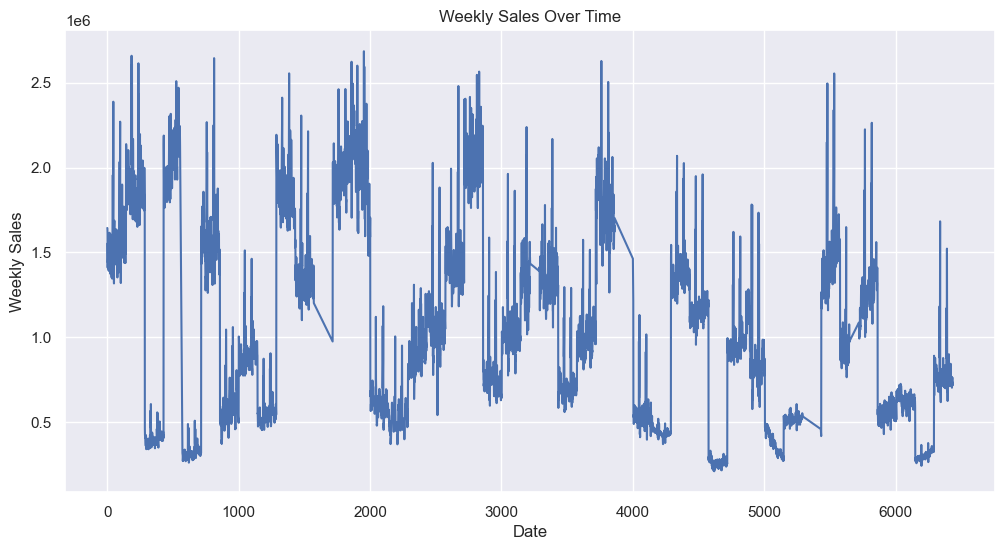

In [261]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=analysis_data.index, y=analysis_data['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')

we can notice that it is non linear time series data

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

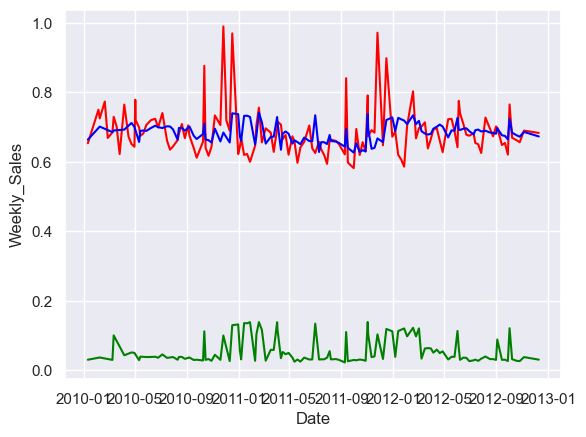

In [262]:
store_1 = time_series_data[time_series_data['Store'] == 2]['Weekly_Sales']    
store_1_mean = store_1.rolling(window=12).mean()
store_1_std = store_1.rolling(window=12).std()
# plt.plot(store_1, color = 'red')
# plt.plot(store_1_mean, color = 'blue')
# plt.plot(store_1_std, color = 'green')
# plt.show()

sns.lineplot(data=store_1, color='red')
sns.lineplot(data=store_1_mean, color='blue')
sns.lineplot(data=store_1_std, color='green')

In [263]:
from statsmodels.tsa.stattools import adfuller

adfuller(store_1)[1]

0.11121921080016162

log transformation

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

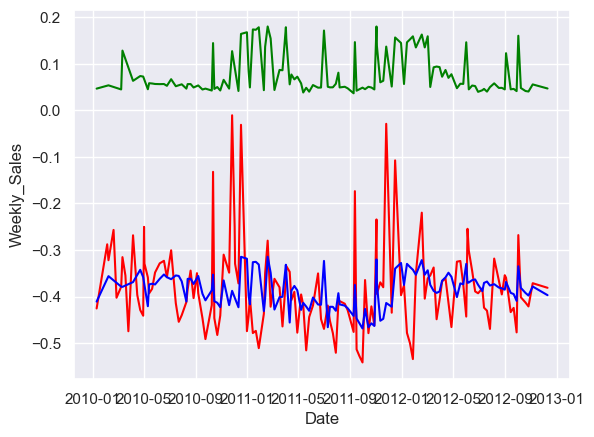

In [264]:
store_1 = np.log(time_series_data[time_series_data['Store'] == 2]['Weekly_Sales'])
store_1_mean = store_1.rolling(window=12).mean()
store_1_std = store_1.rolling(window=12).std()
# plt.plot(store_1, color = 'red')
# plt.plot(store_1_mean, color = 'blue')
# plt.plot(store_1_std, color = 'green')
# plt.show()

sns.lineplot(data=store_1, color='red')
sns.lineplot(data=store_1_mean, color='blue')
sns.lineplot(data=store_1_std, color='green')

In [265]:
adfuller(store_1)[1]

0.12908589898131073

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

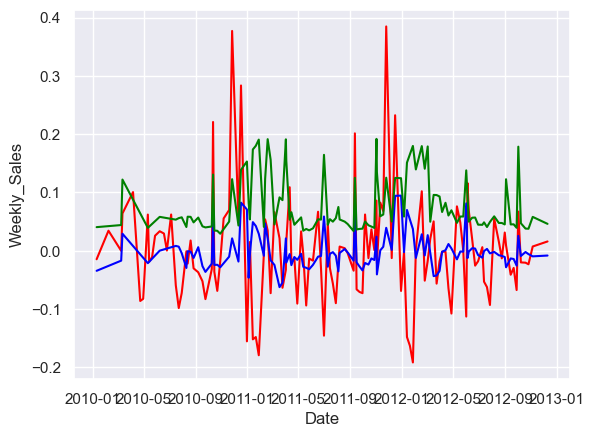

In [266]:
store_1 = store_1 - store_1_mean
store_1_mean = store_1.rolling(window=12).mean()
store_1_std = store_1.rolling(window=12).std()
# plt.plot(store_1, color = 'red')
# plt.plot(store_1_mean, color = 'blue')
# plt.plot(store_1_std, color = 'green')
# plt.show()

sns.lineplot(data=store_1, color='red')
sns.lineplot(data=store_1_mean, color='blue')
sns.lineplot(data=store_1_std, color='green')

In [267]:
store_1.dropna(inplace=True)

In [268]:
adfuller(store_1)[1]

0.026473307590946047

- for store 2 we have removed trends and seasonality 
- also with adfuller test is verified 

In [269]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

In [270]:
# %pip install pmdarima

In [271]:
# from pmdarima.arima import auto_arima

# arima_model = auto_arima(store_1,seasonal=False,trace=True)

In [272]:
# train = store_1[:int(0.8*(len(store_1)))]['Weekly_Sales']
# test = store_1[int(0.8*(len(store_1))):]['Weekly_Sales']

In [273]:

# # Fit the ARIMA model
# model = SARIMAX(train, order=(0, 0, 4), seasonal_order=(0, 0, 4, 52))
# model_fit = model.fit()

# store_1['prediction'] = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)
# store_1[['Weekly_Sales', 'prediction']].plot(figsize=(12, 6))
# # Forecast the next 12 weeks
# # forecast = model_fit.forecast(steps=12)

In [274]:
# plt.figure(figsize=(15, 10))
# plt.plot(forecast.index, forecast.values)

# plt.title('Sales Forecast for the Next 12 Weeks')
# plt.xlabel('Date')
# plt.ylabel('Weekly Sales')
# plt.legend()
# plt.show()

In [275]:
%pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [276]:
from prophet import Prophet

prophet_model = Prophet()

data_prophet = analysis_data[['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

prophet_model.fit(data_prophet)


00:36:56 - cmdstanpy - INFO - Chain [1] start processing
00:36:56 - cmdstanpy - INFO - Chain [1] done processing


In [277]:
future = prophet_model.make_future_dataframe(periods=12, freq='W')
future.tail()

,ds
150,2013-02-03
151,2013-02-10
152,2013-02-17
153,2013-02-24
154,2013-03-03


In [ ]:
forecast = prophet_model.predict(future)

In [282]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-10,1.054978e+06,309247.165540,1.686728e+06,1.054978e+06,1.054978e+06,-76558.137749,-76558.137749,-76558.137749,21939.382135,21939.382135,21939.382135,-98497.519884,-98497.519884,-98497.519884,0.0,0.0,0.0,9.784199e+05
1,2010-02-04,1.054931e+06,290629.079323,1.805917e+06,1.054931e+06,1.054931e+06,11985.629702,11985.629702,11985.629702,-5108.962379,-5108.962379,-5108.962379,17094.592081,17094.592081,17094.592081,0.0,0.0,0.0,1.066917e+06
2,2010-02-07,1.054925e+06,396395.248942,1.820655e+06,1.054925e+06,1.054925e+06,58616.382824,58616.382824,58616.382824,21939.382135,21939.382135,21939.382135,36677.000689,36677.000689,36677.000689,0.0,0.0,0.0,1.113542e+06
3,2010-02-19,1.054903e+06,333135.987834,1.715524e+06,1.054903e+06,1.054903e+06,-1676.734818,-1676.734818,-1676.734818,-22969.423555,-22969.423555,-22969.423555,21292.688738,21292.688738,21292.688738,0.0,0.0,0.0,1.053226e+06
4,2010-02-26,1.054890e+06,385867.616532,1.764518e+06,1.054890e+06,1.054890e+06,-25143.748257,-25143.748257,-25143.748257,-22969.423555,-22969.423555,-22969.423555,-2174.324701,-2174.324701,-2174.324701,0.0,0.0,0.0,1.029746e+06


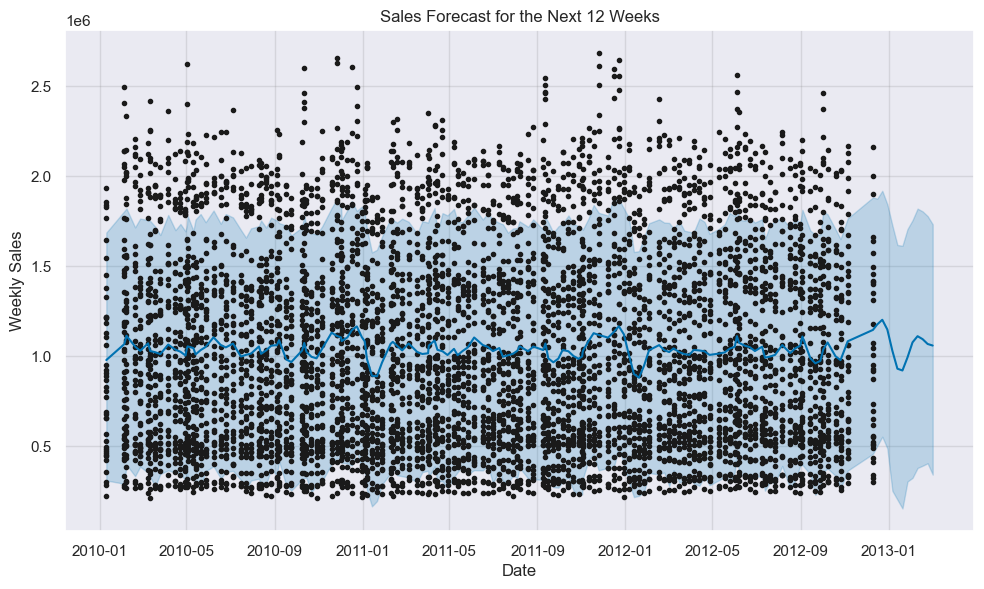

In [279]:
fig = prophet_model.plot(forecast)
plt.title('Sales Forecast for the Next 12 Weeks')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

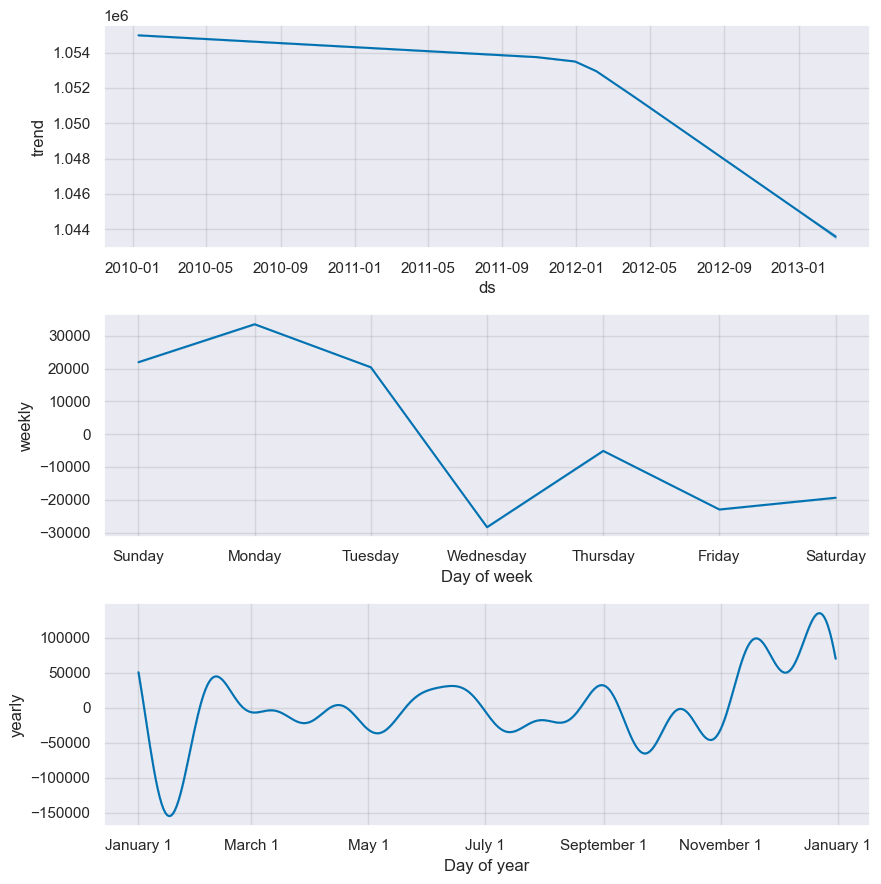

In [280]:
fig2 = prophet_model.plot_components(forecast)
plt.show()